In [121]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon


plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]
df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df['preciousd'] = df['precio']/20

In [112]:
def fix_state_names(state_name):
    fix_these = {
        'México': 'Edo. de México',
        'San Luis Potosí': 'San luis Potosí',
        'Baja California': 'Baja California Norte'
    }
    
    return fix_these.get(state_name, state_name)

In [113]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

In [114]:
mono = df[df["habitaciones"]==1]

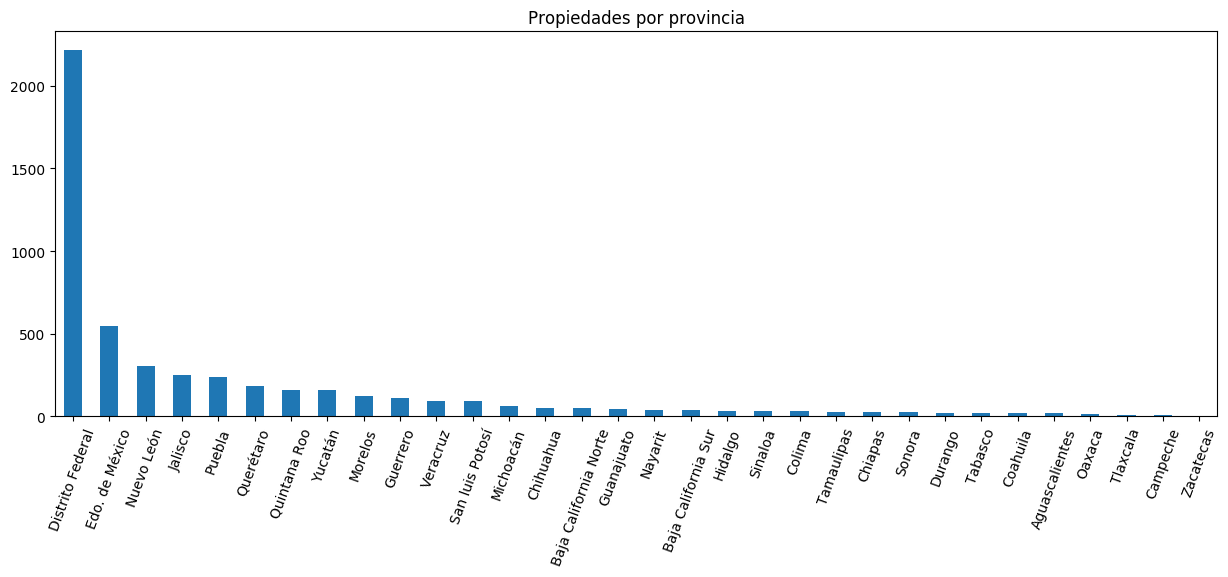

In [115]:
mono.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia")

In [116]:
mono['preciom2usd'] = mono['preciousd'] / mono['metrostotales']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


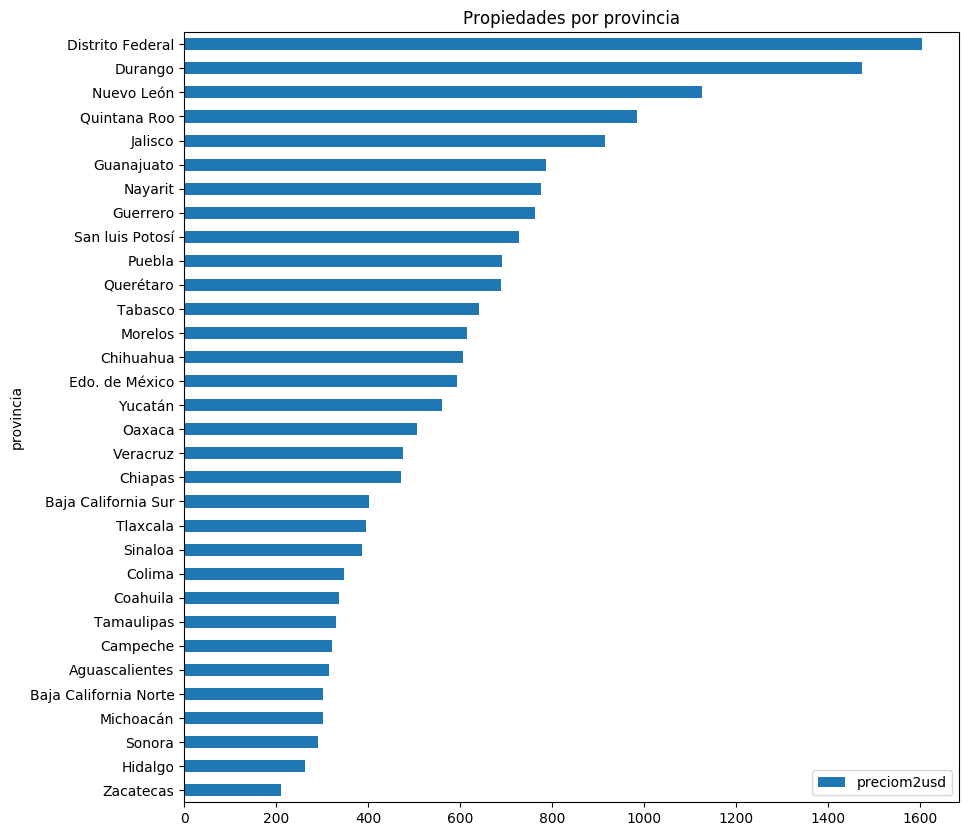

In [117]:
mono_m2_prov = mono.groupby("provincia").agg({"preciom2usd":"mean"}).sort_values(by= "preciom2usd")
mono_m2_prov.plot(kind='barh', figsize=(10, 10),title="Propiedades por provincia")

Text(158.22222222222223, 0.5, 'Año de Publicacion')

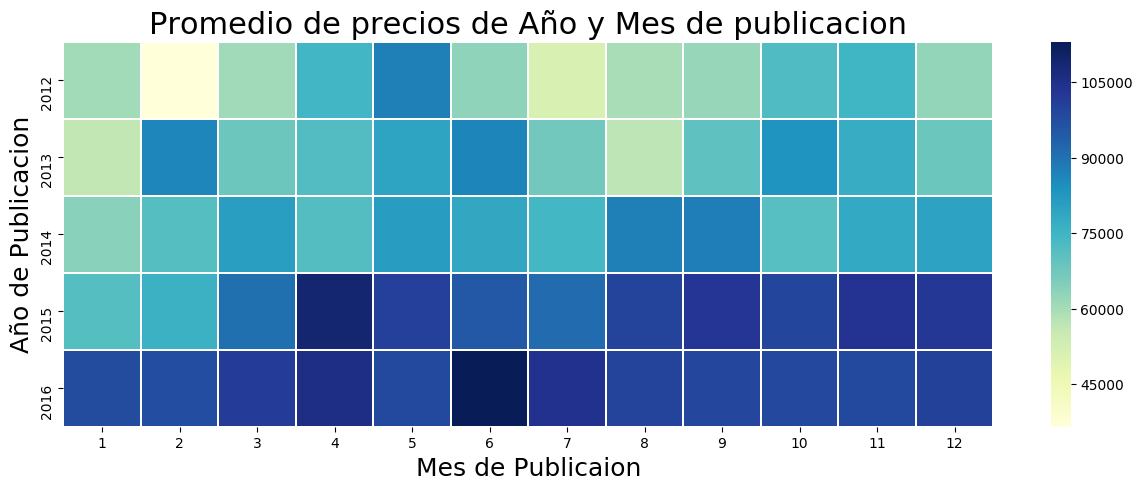

In [118]:
columnas = ["anio de publicacion","mes de publicacion","preciousd"]
publicado = mono[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='preciousd', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Promedio de precios de Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

Text(158.22222222222223, 0.5, 'Año de Publicacion')

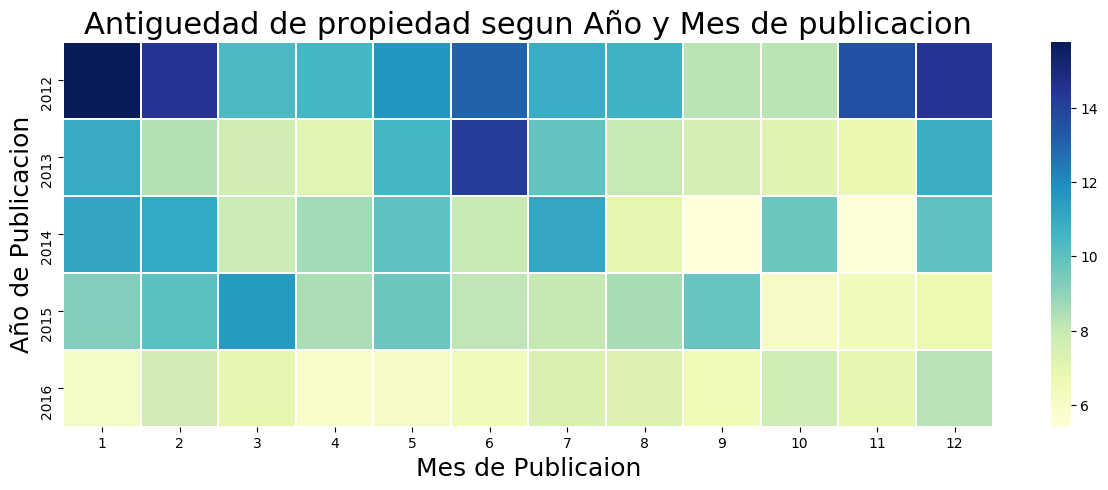

In [119]:
columnas = ["anio de publicacion","mes de publicacion","antiguedad"]
publicado = mono[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='antiguedad', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Antiguedad de propiedad segun Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

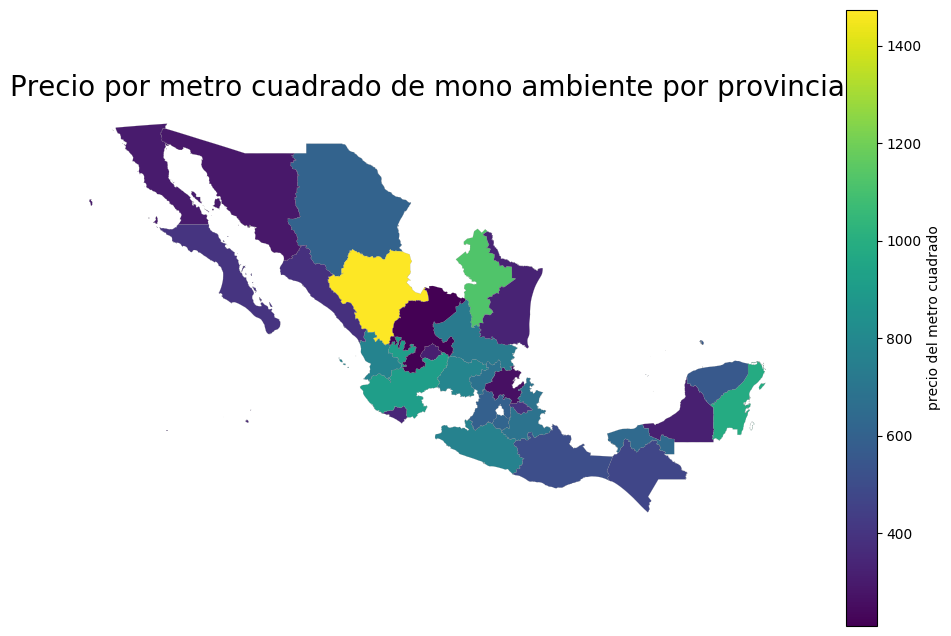

In [124]:
mexico = gpd.read_file('data/shapes/MEX_adm1.shp')

mexico = mexico.rename(columns={"Name":"NAME_1"})

mexico['NAME_1'] = mexico['NAME_1'].map(fix_state_names)

mono_avg_preciom2 = mono.groupby('provincia').agg({'preciom2usd': 'mean'})\
                        .reset_index().rename(columns={'preciom2usd': 'avg preciom2usd'})\
                        .sort_values('avg preciom2usd', ascending=False)

mexico = pd.merge(left=mexico, right=mono_avg_preciom2, left_on='NAME_1', right_on='provincia')

vmin = mexico['avg preciom2usd'].min()
vmax = mexico['avg preciom2usd'].max()

fig, ax = plt.subplots()
mexico.plot(ax=ax, column='avg preciom2usd', cmap='viridis', linewidth=0.1, edgecolor='0.5')
ax.set_title('Precio por metro cuadrado de mono ambiente por provincia', fontsize=20)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('precio del metro cuadrado');

In [125]:
mono_avg_preciom2

,provincia,avg preciom2usd
8,Distrito Federal,1604.928637
9,Durango,1473.656962
18,Nuevo León,1124.990420
22,Quintana Roo,984.579951
14,Jalisco,915.403914
11,Guanajuato,786.851872
17,Nayarit,775.451754
12,Guerrero,763.275701
23,San luis Potosí,727.986888
20,Puebla,690.716632
